# Stats by category

In [2]:
import pandas as pd

# Analyse data

## MetaData

Focus on distribution by year, and select a range of products that will be interessting

### Subscription Boxes

In [3]:
import pandas as pd

df_meta_SubBox = pd.read_json("data/meta_Subscription_Boxes.jsonl", lines=True)
df_meta_SubBox.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,SUBSCRIPTION BOXES,Loved Again Media - Movie Subscription Box - 1...,4.1,75,[10 gently used DVDs delivered to your door ev...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Loved Again Media,[],{},B08W5BSH6V,NaN
1,SUBSCRIPTION BOXES,Bravado Music Icons T-Shirt Club Subscription ...,3.9,329,[WHAT IS T-SHIRT CLUB? Created for the ultimat...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Bravado Music Icons,[],{},B08MV3QHL8,NaN
2,SUBSCRIPTION BOXES,Succulents Box - 2 Succulents 2 Clay Pots Subs...,3.8,928,[You'll receive a box of succulents in clay po...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],SUCCULENTS BOX,[],{},B084KPB9K8,NaN
3,SUBSCRIPTION BOXES,The Legend of Vox Machina T-Shirt Club Subscri...,4.4,47,[WHAT IS T-SHIRT CLUB? Created for the ultimat...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],The Legend of Vox Machina,[],{},B09YYGB4BH,NaN
4,SUBSCRIPTION BOXES,50 States Of Mine - Premium Subscription Box: ...,4.6,6,[6-10 quality curated items from a different s...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],50 States Of Mine,[],{},B092MLYDGR,NaN


In [4]:
# Checking data type
df_meta_SubBox.dtypes

main_category       object
title               object
average_rating     float64
rating_number        int64
features            object
description         object
price              float64
images              object
videos              object
store               object
categories          object
details             object
parent_asin         object
bought_together    float64
dtype: object

In [5]:
# Checking Missing Values
df_meta_SubBox.isna().sum()

main_category        0
title                0
average_rating       0
rating_number        0
features             0
description          0
price              641
images               0
videos               0
store                1
categories           0
details              0
parent_asin          0
bought_together    641
dtype: int64

#### Notes :

Price and bought_together are to be deleted

In [6]:
df_meta_SubBox.drop(["price","bought_together"], axis=1, inplace=True)

Yet other column has a different type that doesn't get detected by the function "isna", which are the lists, so the following is a speciale analysis to evaluate them

In [7]:
print("All lines count : ", tot:=df_meta_SubBox.shape[0]) 
print("description null values : ", count:=df_meta_SubBox.description.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("videos null values : ", count:=df_meta_SubBox.videos.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("details null values : ", count:=df_meta_SubBox.details.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("categories null values : ", count:=df_meta_SubBox.categories.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("features null values : ", count:=df_meta_SubBox.features.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("images null values : ", count:=df_meta_SubBox.images.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")

All lines count :  641
description null values :  641  Null Pourcentage 100%
videos null values :  641  Null Pourcentage 100%
details null values :  600  Null Pourcentage 94%
categories null values :  641  Null Pourcentage 100%
features null values :  19  Null Pourcentage 3%
images null values :  0  Null Pourcentage 0%


4 out of 6 these feature has approximatly 100% of missing values To be deleted, except images and features

In [8]:
# To be deleted
df_meta_SubBox.drop(["description","videos","details","categories"], axis=1, inplace=True)

<Axes: ylabel='Density'>

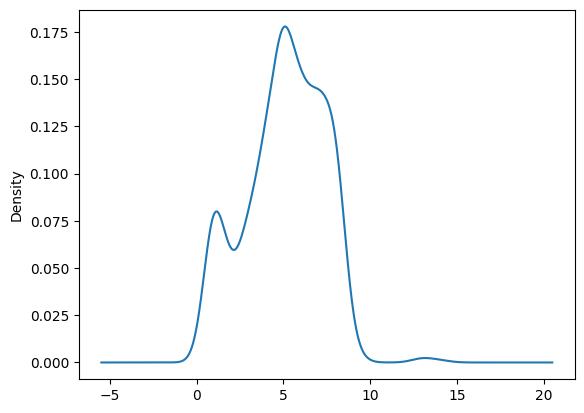

In [9]:
# Images
df_meta_SubBox.images.apply(len).plot(kind="density")

Apparently this feature seems interesting but in a different format, because there is an opportunity to appy computer vision to retrieve info from this feature. But we will get limited to the number of images per product. [This feature might get deleted after correlation analysis]

In [10]:
df_meta_SubBox.images = df_meta_SubBox.images.apply(len)

<Axes: ylabel='Density'>

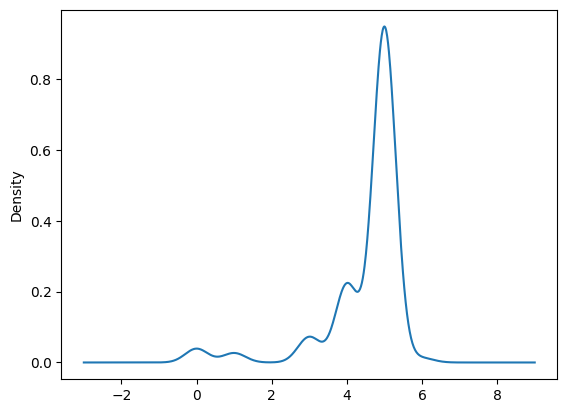

In [11]:
# features
df_meta_SubBox.features.apply(len).plot(kind="density")

<Axes: ylabel='Density'>

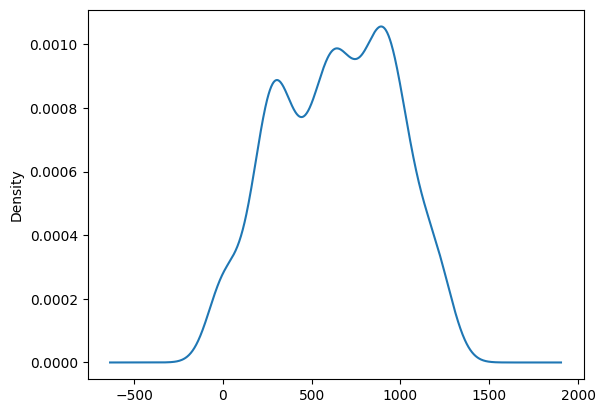

In [12]:
# Calculating number of tokens per row
df_meta_SubBox.features.apply(lambda l:sum([len(x) for x in l])).plot(kind="density")  # the len can be replaced by a special function for word counting

In [13]:
# Processing the text format into one str for future embedding
df_meta_SubBox.features = df_meta_SubBox.features.apply(lambda x:' '.join(x))

In [14]:
df_meta_SubBox.head()

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
0,SUBSCRIPTION BOXES,Loved Again Media - Movie Subscription Box - 1...,4.1,75,10 gently used DVDs delivered to your door eve...,7,Loved Again Media,B08W5BSH6V
1,SUBSCRIPTION BOXES,Bravado Music Icons T-Shirt Club Subscription ...,3.9,329,WHAT IS T-SHIRT CLUB? Created for the ultimate...,2,Bravado Music Icons,B08MV3QHL8
2,SUBSCRIPTION BOXES,Succulents Box - 2 Succulents 2 Clay Pots Subs...,3.8,928,You'll receive a box of succulents in clay pot...,8,SUCCULENTS BOX,B084KPB9K8
3,SUBSCRIPTION BOXES,The Legend of Vox Machina T-Shirt Club Subscri...,4.4,47,WHAT IS T-SHIRT CLUB? Created for the ultimate...,2,The Legend of Vox Machina,B09YYGB4BH
4,SUBSCRIPTION BOXES,50 States Of Mine - Premium Subscription Box: ...,4.6,6,6-10 quality curated items from a different st...,4,50 States Of Mine,B092MLYDGR


Our next feature of interest is going to be rating number in order to evaluate the reviews dataset

<Axes: ylabel='Density'>

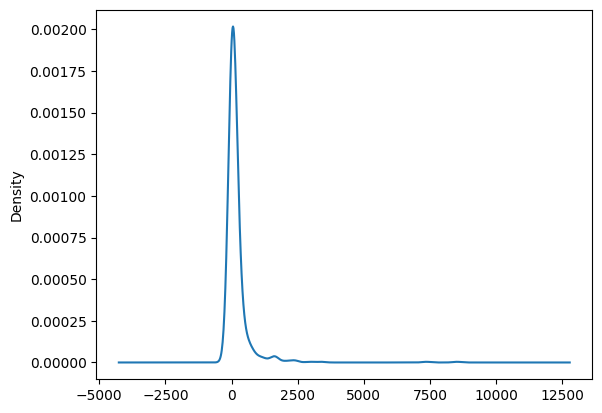

In [15]:
# calculating the distribution of reviews per product
df_meta_SubBox.groupby(by="parent_asin").agg({"rating_number":"sum"}).rating_number.plot(kind='density')

<Axes: ylabel='Density'>

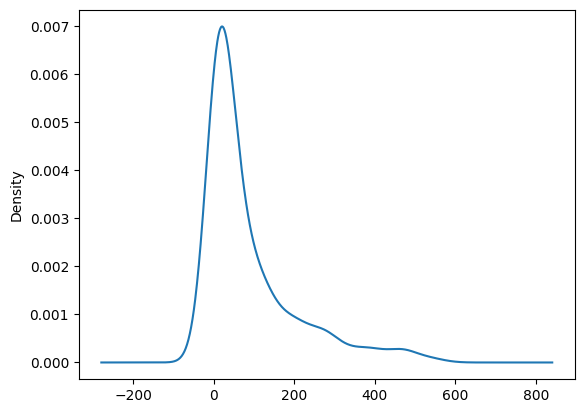

In [16]:
# Zoom In
df_meta_SubBox[df_meta_SubBox.rating_number < 600].groupby(by="parent_asin").agg({"rating_number":"sum"}).rating_number.plot(kind='density')

In [17]:
df_meta_SubBox.rating_number.apply(lambda x:0 if x<200 else 1).value_counts()

rating_number
0    509
1    132
Name: count, dtype: int64

In [18]:
count = str(df_meta_SubBox[df_meta_SubBox.rating_number > 200].rating_number.sum())
print(f"Number of reviews for this condition : {count}")
print(f"data pourcentage : {round(int(count)*100/df_meta_SubBox.rating_number.sum())} %")

Number of reviews for this condition : 101556
data pourcentage : 81 %


In order to get a clean data that is most suitable for outliers detection we will focus on products with more than 200 reviews which will consist on : 81 % of reviews (in the other data set)

In [19]:
df_meta_SubBox = df_meta_SubBox[df_meta_SubBox.rating_number >200]

In [20]:
df_meta_SubBox.head()

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
1,SUBSCRIPTION BOXES,Bravado Music Icons T-Shirt Club Subscription ...,3.9,329,WHAT IS T-SHIRT CLUB? Created for the ultimate...,2,Bravado Music Icons,B08MV3QHL8
2,SUBSCRIPTION BOXES,Succulents Box - 2 Succulents 2 Clay Pots Subs...,3.8,928,You'll receive a box of succulents in clay pot...,8,SUCCULENTS BOX,B084KPB9K8
5,SUBSCRIPTION BOXES,Funko Star Wars Smuggler's Bounty Box,4.5,1613,The Star Wars Smuggler’s Bounty subscription b...,5,Funko,B07GNX34XV
7,SUBSCRIPTION BOXES,Costa Farms O2 For You Live Indoor Plant and S...,4.4,265,Each subscription box includes at least one of...,5,Costa Farms,B097F23P6Z
16,SUBSCRIPTION BOXES,Marvel Design Vault Club T-Shirt Subscription ...,4.3,1408,WHAT IS T-SHIRT CLUB? Created for the ultimate...,8,Marvel,B08GDYSVNN


Store

In [21]:
df_meta_SubBox.store.value_counts()

store
Funko                      30
Highlights for Children     5
Little Passports            4
Candy Club                  4
SnackNation                 4
                           ..
SPREZZA                     1
Foot Cardigan               1
Treats                      1
Amazon Music                1
ArtSnacks                   1
Name: count, Length: 75, dtype: int64

In [22]:
print(df_meta_SubBox[~df_meta_SubBox.store.isin(["Funko"])].rating_number.sum()) #, test_data_2d[~outliers, 1]
print(df_meta_SubBox[df_meta_SubBox.store.isin(["Funko"])].rating_number.sum()) #, test_data_2d[~outliers, 1]


76515
25041


In order to clean more the data we will abandon all reviews for the store Funko so that the data of this category will be more well class varied.

In [23]:
df_meta_SubBox = df_meta_SubBox[~df_meta_SubBox.store.isin(["Funko"])]

The last feature to be analysed is the main category.

In [24]:
df_meta_SubBox.main_category.value_counts()

main_category
SUBSCRIPTION BOXES    102
Name: count, dtype: int64

since the category has only one value, it would be possible for it to be deleted if the information was not needed in the model

### Software

In [25]:
df_meta_Soft = pd.read_json("data/meta_Software.jsonl", lines=True)
df_meta_Soft.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Appstore for Android,Accupressure Guide,3.6,NaN,[All the pressing point has been explained wit...,[Acupressure technique is very ancient and ver...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",mAppsguru,[],"{'Release Date': '2015', 'Date first listed on...",B00VRPSGEO,NaN,NaN,NaN
1,Appstore for Android,Ankylosaurus Fights Back - Smithsonian's Prehi...,4.0,NaN,[ENCOURAGE literacy skills with highlighted na...,[Join Ankylosaurus in this interactive book ap...,2.99,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]","Oceanhouse Media, Inc",[],"{'Release Date': '2014', 'Date first listed on...",B00NWQXXHQ,NaN,NaN,NaN
2,Appstore for Android,Mahjong 2015,3.1,NaN,[Mahjong 2015 is a free solitaire matching gam...,[Mahjong 2015 is a free solitaire matching gam...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",sophiathach,[],"{'Release Date': '2014', 'Date first listed on...",B00RFKP6AC,NaN,NaN,NaN
3,Appstore for Android,Jewels Brick Breakout,4.2,NaN,"[Game Features:, - Intuitive touch controls wi...",[Jewels Brick Breakout is a glowing jewels bri...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",Bad Chicken,[],"{'Release Date': '2015', 'Date first listed on...",B00SP2QU0E,NaN,NaN,NaN
4,Appstore for Android,Traffic Police: Off-Road Cub,3.3,NaN,"[In this game you will find:, - Killer police ...",[Become the best road police officer in Cube C...,0.00,[{'large': 'https://m.media-amazon.com/images/...,"[{'title': '', 'url': '', 'user_id': ''}]",Dast 2 For Metro,[],"{'Release Date': '2016', 'Date first listed on...",B01DZIT64O,NaN,NaN,NaN


In [26]:
# Checking data type
df_meta_Soft.dtypes

main_category       object
title               object
average_rating     float64
rating_number      float64
features            object
description         object
price              float64
images              object
videos              object
store               object
categories          object
details             object
parent_asin         object
bought_together    float64
subtitle           float64
author             float64
dtype: object

In [27]:
# Checking Missing Values
df_meta_Soft.isna().sum()*100/df_meta_Soft.shape[0]

main_category        1.982051
title                0.000000
average_rating       0.028011
rating_number        3.315369
features             0.000000
description          0.000000
price               20.465877
images               0.000000
videos               0.000000
store                0.238653
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
subtitle           100.000000
author             100.000000
dtype: float64

#### Notes :

subtitle,author  and bought_together are to be deleted, Price will be deleted since that this info is not necessary for reviews

In [28]:
df_meta_Soft.drop(["bought_together","author","subtitle","price"], axis=1, inplace=True)

Yet other column has a different type that doesn't get detected by the function "isna", which are the lists, so the following is a speciale analysis to evaluate them

In [29]:
print("All lines count : ", tot:=df_meta_Soft.shape[0]) 
print("description null values : ", count:=df_meta_Soft.description.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("videos null values : ", count:=df_meta_Soft.videos.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("details null values : ", count:=df_meta_Soft.details.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("categories null values : ", count:=df_meta_Soft.categories.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("features null values : ", count:=df_meta_Soft.features.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("images null values : ", count:=df_meta_Soft.images.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")

All lines count :  89251
description null values :  4125  Null Pourcentage 5%
videos null values :  18673  Null Pourcentage 21%
details null values :  689  Null Pourcentage 1%
categories null values :  70460  Null Pourcentage 79%
features null values :  5475  Null Pourcentage 6%
images null values :  4  Null Pourcentage 0%


"description" has a high percentage of missing values ==> To be deleted,

In order to assure the comformity with the "Subscription Box" data set, we will delete "description", "videos", "details". Also "Images" and "features" will get the same processing after analysis

In [30]:
# To be deleted
df_meta_Soft.drop(["description","videos","details","categories"], axis=1, inplace=True)

<Axes: ylabel='Density'>

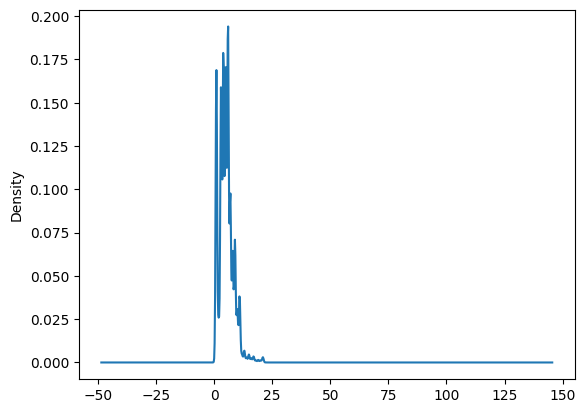

In [31]:
# Images
df_meta_Soft.images.apply(len).plot(kind="density")

In [32]:
df_meta_Soft.images = df_meta_Soft.images.apply(len)

<Axes: ylabel='Density'>

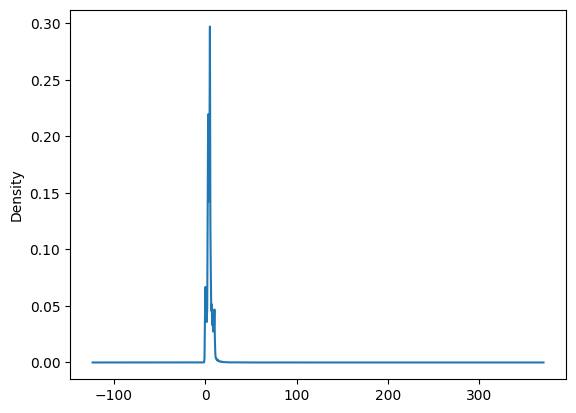

In [33]:
# features
df_meta_Soft.features.apply(len).plot(kind="density") # Reminder using a count function by token will give more accurate analysis

The first thing to notice is that we have some products with features a big lenght of features, so we will evaluate them to decide whether its better to remove them.

The evaluation will be made even though these products exists on the last ~10% percentile, because the number of reviews could be higher than expected

In [34]:
draft = df_meta_Soft[df_meta_Soft.features.apply(len)>50]
(f"{draft.parent_asin.nunique()}")

'33'

In [35]:
(f" pourcentage of reviews coming into products with more than 50 elements in features :  {(draft.rating_number.sum()*100/df_meta_Soft.rating_number.sum())}%")

' pourcentage of reviews coming into products with more than 50 elements in features :  0.0010166019790504948%'

<Axes: ylabel='Density'>

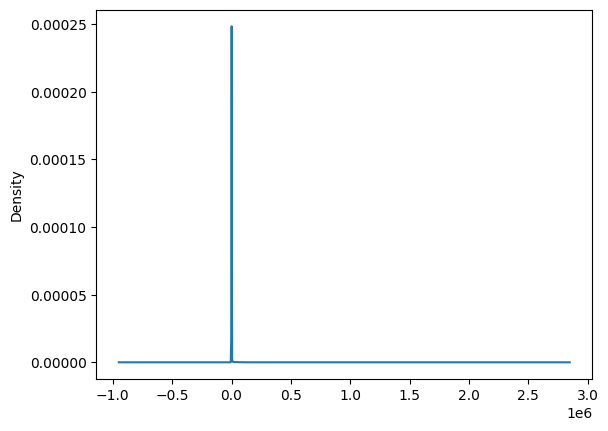

In [36]:
# Analysis by product (parent_asin)
df_meta_Soft.groupby(by="parent_asin").agg({"rating_number":"sum"}).rating_number.plot(kind='density')

In [37]:
# Number of reviews per product
draft_ = df_meta_Soft.groupby(by="parent_asin").agg({"rating_number":"sum"}).sort_values(by='rating_number')
draft_

,rating_number
parent_asin,
B00XX90VJK,0.0
B00XVSTAMM,0.0
B004S7V7VW,0.0
B01N14UGJ1,0.0
B01N1H9HVN,0.0
...,...
B07XDD7GYT,464483.0
B01N0BP507,672812.0
B00KDSGIPK,776283.0


In [38]:
# Zoom in on a selection of products with high number of reviews
draft_list = ["B01N0BP507","B00KDSGIPK","B09H9CWGQN","B07T771SPH"]
df_meta_Soft[df_meta_Soft.parent_asin.isin(draft_list)]

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
9566,Appstore for Android,Disney+,4.5,1011284.0,"[Exclusive new Originals from Disney, Pixar, M...",12,"Disney Electronic Content, Inc.",B09H9CWGQN
18966,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,[Watch 100+ HD channels with 24/7 free content...,14,Pluto TV,B00KDSGIPK
24892,Appstore for Android,Downloader,4.2,672812.0,"[Download files by entering their URL., Built-...",21,AFTVnews.com,B01N0BP507
43676,Appstore for Android,YouTube,4.6,1898759.0,[Browse by interest - Discover videos you’ll l...,10,Google LLC,B07T771SPH


In [39]:
print(f"Percentage of these reviews (last data frame) :   {(count:=draft_.rating_number.iloc[-4:].sum())*100/draft_.rating_number.sum()}")
print(f"Count of these reviews :   {count}")

Percentage of these reviews (last data frame) :   8.057287850462211
Count of these reviews :   4359138.0


- Focusing only on this data set will bring us ahead of our target (1M transaction), so we will focus only on these 4 products. 

In [40]:
df_meta_Soft = df_meta_Soft[df_meta_Soft.parent_asin.isin(draft_list)]

<Axes: ylabel='Density'>

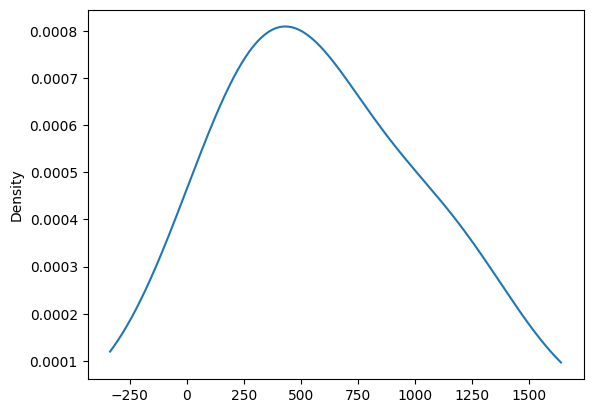

In [41]:
# Calculating number of tokens per row
df_meta_Soft.features.apply(lambda l:sum([len(x) for x in l])).plot(kind="density")  # the len can be replaced by a special function for word counting

In [42]:
# Processing the text format into one str for future embedding
df_meta_Soft.features = df_meta_Soft.features.apply(lambda x:' '.join(x))

In [43]:
df_meta_Soft.head()

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
9566,Appstore for Android,Disney+,4.5,1011284.0,"Exclusive new Originals from Disney, Pixar, Ma...",12,"Disney Electronic Content, Inc.",B09H9CWGQN
18966,Appstore for Android,Pluto TV - It’s Free TV,4.2,776283.0,Watch 100+ HD channels with 24/7 free content ...,14,Pluto TV,B00KDSGIPK
24892,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com,B01N0BP507
43676,Appstore for Android,YouTube,4.6,1898759.0,Browse by interest - Discover videos you’ll lo...,10,Google LLC,B07T771SPH


The last feature to be analysed is the main category.

In [44]:
df_meta_Soft.main_category.value_counts()

main_category
Appstore for Android    4
Name: count, dtype: int64

since the category has only one value, it would be possible for it to be deleted if the information was not needed in the model

### Video Games

In [45]:
df_meta_VGames = pd.read_json("data/meta_Video_Games.jsonl", lines=True)
df_meta_VGames.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Video Games,Dash 8-300 Professional Add-On,5.0,1,[Features Dash 8-300 and 8-Q300 ('Q' rollout l...,[The Dash 8-300 Professional Add-On lets you p...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Aerosoft,"[Video Games, PC, Games]",{'Pricing': 'The strikethrough price is the Li...,B000FH0MHO,NaN,NaN,NaN
1,Video Games,Phantasmagoria: A Puzzle of Flesh,4.1,18,[Windows 95],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Sierra,"[Video Games, PC, Games]","{'Best Sellers Rank': {'Video Games': 137612, ...",B00069EVOG,NaN,NaN,NaN
2,Video Games,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,[The #1 rated NBA video game simulation series...,[Following the record-breaking launch of NBA 2...,58.0,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'NBA 2K17 - Kobe: Haters vs Players...,2K,"[Video Games, PlayStation 4, Games]","{'Release date': 'September 16, 2016', 'Best S...",B00Z9TLVK0,NaN,NaN,NaN
3,Video Games,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,[Authentic Nintendo Selects: The Legend of Zel...,[],37.42,[{'thumb': 'https://m.media-amazon.com/images/...,[],Amazon Renewed,"[Video Games, Legacy Systems, Nintendo Systems...","{'Best Sellers Rank': {'Video Games': 51019, '...",B07SZJZV88,NaN,NaN,NaN
4,Video Games,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,"[Includes (9) Total Accessories, Pedometer, Wi...",[The Thrustmaster Motion Plus Elite Fitness Pa...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],THRUSTMASTER,"[Video Games, Legacy Systems, Nintendo Systems...","{'Release date': 'November 1, 2009', 'Pricing'...",B002WH4ZJG,NaN,NaN,NaN


In [46]:
# Checking data type
df_meta_VGames.dtypes

main_category       object
title               object
average_rating     float64
rating_number        int64
features            object
description         object
price               object
images              object
videos              object
store               object
categories          object
details             object
parent_asin         object
bought_together    float64
subtitle            object
author              object
dtype: object

In [47]:
# Checking Missing Values
df_meta_VGames.isna().sum()*100/df_meta_VGames.shape[0]

main_category        8.038960
title                0.000000
average_rating       0.000000
rating_number        0.000000
features             0.000000
description          0.000000
price               54.827383
images               0.000000
videos               0.000000
store                3.176974
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
subtitle            99.745026
author              99.809134
dtype: float64

#### Notes :

subtitle,author  and bought_together are to be deleted, Price will be deleted since that this info is not necessary for reviews

In [48]:
df_meta_VGames.drop(["bought_together","author","subtitle","price"], axis=1, inplace=True)

Yet other column has a different type that doesn't get detected by the function "isna", which are the lists, so the following is a speciale analysis to evaluate them

In [49]:
print("All lines count : ", tot:=df_meta_VGames.shape[0]) 
print("description null values : ", count:=df_meta_VGames.description.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("videos null values : ", count:=df_meta_VGames.videos.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("details null values : ", count:=df_meta_VGames.details.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("categories null values : ", count:=df_meta_VGames.categories.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("features null values : ", count:=df_meta_VGames.features.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")
print("images null values : ", count:=df_meta_VGames.images.apply(lambda x: 1 if len(x) == 0 else 0).sum(),f" Null Pourcentage {round(count*100/tot)}%")

All lines count :  137269
description null values :  51730  Null Pourcentage 38%
videos null values :  108356  Null Pourcentage 79%
details null values :  3422  Null Pourcentage 2%
categories null values :  12637  Null Pourcentage 9%
features null values :  39498  Null Pourcentage 29%
images null values :  142  Null Pourcentage 0%


- "description" has a high percentage of missing values ==> To be deleted,

- In order to assure the comformity with the "Subscription Box" data set, we will delete "description", "videos", "details". Also "Images" and "features" will get the same processing after analysis

- Feature has 30% of missing values, so we will opt for kmeans for filling missing values after embeddings

In [50]:
# To be deleted
df_meta_VGames.drop(["description","videos","details","categories"], axis=1, inplace=True)

<Axes: ylabel='Density'>

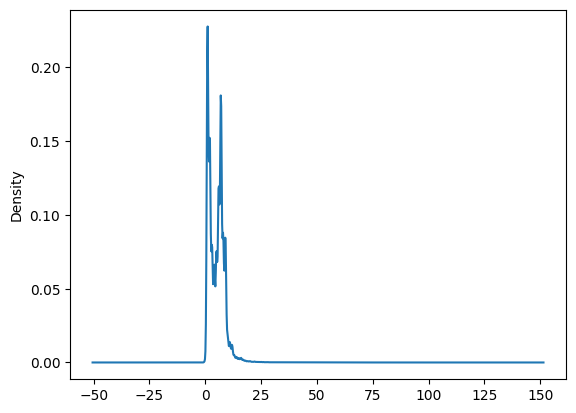

In [51]:
# Images
df_meta_VGames.images.apply(len).plot(kind="density")

In [52]:
df_meta_VGames.images = df_meta_VGames.images.apply(len)

<Axes: ylabel='Density'>

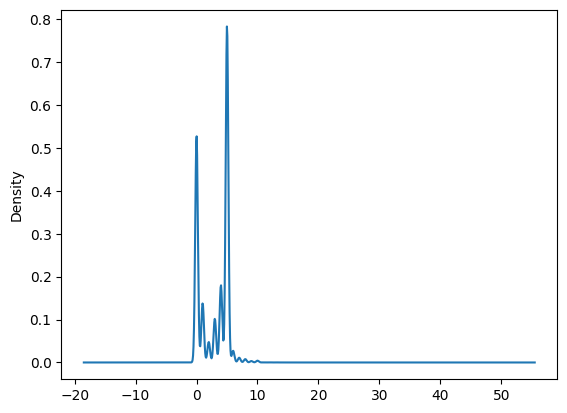

In [53]:
# features
df_meta_VGames.features.apply(len).plot(kind="density") # Reminder using a count function by token will give more accurate analysis

The first thing to notice is that we have some products with features a big lenght of features, so we will evaluate them to decide whether its better to remove them.

The evaluation will be made even though these products exists on the last ~10% percentile, because the number of reviews could be higher than expected

In [54]:
draft = df_meta_VGames[df_meta_VGames.features.apply(len)>10]
(f"{draft.parent_asin.nunique()}")

'108'

In [55]:
print(f" pourcentage of reviews coming into products with more than 10 elements in features :  {(draft.rating_number.sum()*100/df_meta_VGames.rating_number.sum())}%")
print(f" Count of reviews coming into products with more than 10 elements in features :  {draft.rating_number.sum()}")

 pourcentage of reviews coming into products with more than 10 elements in features :  0.8346435115130929%
 Count of reviews coming into products with more than 10 elements in features :  279902


<Axes: ylabel='Density'>

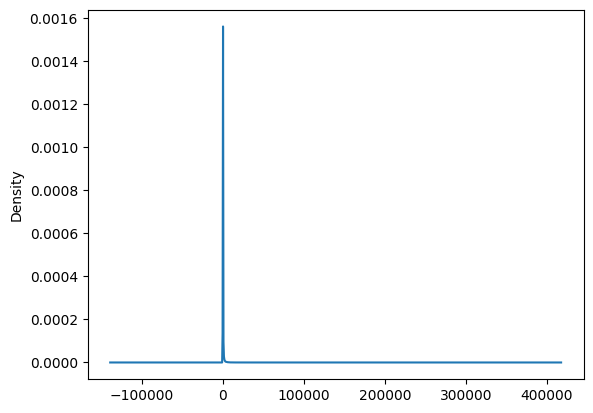

In [56]:
# Analysis by product (parent_asin)
df_meta_VGames.groupby(by="parent_asin").agg({"rating_number":"sum"}).rating_number.plot(kind='density') # number of reviews per product distribution

In [57]:
# Number of reviews per product
draft_ = df_meta_VGames.groupby(by="parent_asin").agg({"rating_number":"sum"}).sort_values(by='rating_number')
draft_

,rating_number
parent_asin,
B06X91N86D,1
B06XC8DBPJ,1
B06XDM88GS,1
B06X18BPKJ,1
B06X18DM5S,1
...,...
B00PB8N364,129962
B07V8YSBFG,139255
B07KRWJCQW,171822


In [58]:
# Zoom in on a selection of products with high number of reviews
draft_list = list(draft_[-2:].index) # Selection of products with the highest number of reviews
df_meta_VGames[df_meta_VGames.parent_asin.isin(draft_list)]

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
1766,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,[Must be 18+yrs and have an account for PlaySt...,3,PlayStation,B0BL65X86R
25881,Computers,"SanDisk 128GB microSDXC-Card, Licensed for Nin...",4.9,278574,[Incredible speeds in a microSD card officiall...,8,SanDisk,B0C3KYVDWT


In [59]:
print(f"Percentage of these reviews (last data frame) :   {(count:=draft_.rating_number.iloc[-2:].sum())*100/draft_.rating_number.sum()}%")
print(f"Count of these reviews :   {count}")

Percentage of these reviews (last data frame) :   1.6097918877941788%
Count of these reviews :   539852


- Focusing only on this data set will bring us ahead of our target (1M transaction), so we will focus only on these 2 products.

In [60]:
df_meta_VGames = df_meta_VGames[df_meta_VGames.parent_asin.isin(draft_list)]

<Axes: ylabel='Density'>

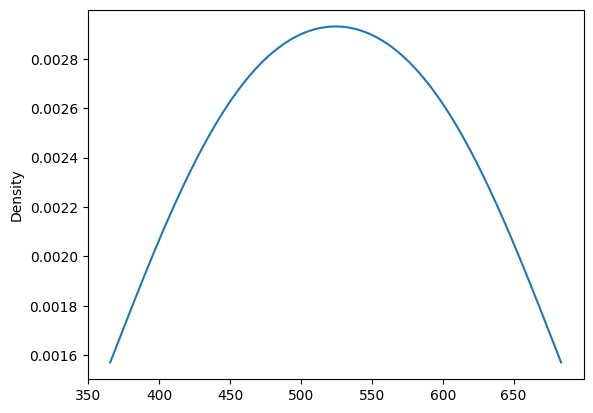

In [61]:
# Calculating number of tokens per row
df_meta_VGames.features.apply(lambda l:sum([len(x) for x in l])).plot(kind="density")  # the len can be replaced by a special function for word counting

In [62]:
# Processing the text format into one str for future embedding
df_meta_VGames.features = df_meta_VGames.features.apply(lambda x:' '.join(x))

In [63]:
df_meta_VGames.head()

,main_category,title,average_rating,rating_number,features,images,store,parent_asin
1766,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation,B0BL65X86R
25881,Computers,"SanDisk 128GB microSDXC-Card, Licensed for Nin...",4.9,278574,Incredible speeds in a microSD card officially...,8,SanDisk,B0C3KYVDWT


The last feature to be analysed is the main category.

In [64]:
df_meta_VGames.main_category.value_counts()

main_category
Video Games    1
Computers      1
Name: count, dtype: int64

since the category has only one value, it would be possible for it to be deleted if the information was not needed in the model

## Reviews data

The challenge with this data is to read while applying the filters deducted from the meta data analysis

Also as a to optimize more the dataset, we will focus more on the range of years between 2016-2019 ( to get a smaller size of data as well as avoiding the covid effect)

### Subscription Boxes

In [65]:
# Defining conditions
descired_products = list(df_meta_SubBox.parent_asin.values)
descired_years = [i for i in range(2015,2019)]

In [66]:
import jsonlines
from tqdm import tqdm

# Read and filter data
filtered_data = []
with jsonlines.open('data/Subscription_Boxes.jsonl') as reader:
    for obj in tqdm(reader):
        if (obj['parent_asin'] in descired_products)&(pd.to_datetime(obj["timestamp"], errors='coerce', unit='ms').year in descired_years):
            filtered_data.append(obj)
print(len(filtered_data))

3761it [00:00, 12570.58it/s]

16216it [00:01, 12615.26it/s]

1915


In [67]:
filtered_data = pd.DataFrame(data = filtered_data)
filtered_data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Bezos Forever,Santa 🎅 picking stuff. Santa cool. Mommy payin...,[],B01M7UDAVI,B01M7UDAVI,AHTDREL6WJZKDE6HX5S3PYVSUXOA,1527642051491,2,True
1,2.0,"not sure this really is worth it, maybe if ...","not sure this really is worth it, maybe if the...",[],B0742LVLMJ,B07N1572VL,AEVVYSXOU37J2NGR4246HG36O34A,1528243734450,0,True
2,5.0,Five Stars,"fun, great products",[],B0742LVLMJ,B07N1572VL,AFQI5XYLCHRYESI6D7Y2PE6JDY5Q,1522861570853,0,True
3,5.0,Love Allure!!,Subbing through Amazon is the way to go! My bo...,[],B0742LVLMJ,B07N1572VL,AGZZ64TPIWVZJPV72BJVFRNRZKBA,1540582444384,0,True
4,3.0,Good sample sizes,Sample size was good but colors not appropriat...,[],B0742LVLMJ,B07N1572VL,AFNROKKDJJV3ALTVVMBNGESZTD6A,1517840411168,2,True


In [68]:
# analysisng images because the key is duplicated
filtered_data.images.apply(len).value_counts()

images
0     1821
1       61
2       18
3       12
11       1
6        1
4        1
Name: count, dtype: int64

In [69]:
# We will keep it with the same format as images for meta data
filtered_data.images = filtered_data.images.apply(len)
# Fixing Tiemstamp format
filtered_data.timestamp = filtered_data.timestamp.apply(lambda timestamp : pd.to_datetime(timestamp, errors='coerce', unit='ms') )

In [70]:
df_SubBox = pd.merge(
    filtered_data.rename(columns={'images' : 'images_by_user'}), 
    df_meta_SubBox.rename(columns={'images' : 'images_of_product'}),
    on='parent_asin'
    )
print(df_SubBox.shape)
df_SubBox.head()

(1915, 17)


,rating,title_x,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,average_rating,rating_number,features,images_of_product,store
0,5.0,Bezos Forever,Santa 🎅 picking stuff. Santa cool. Mommy payin...,0,B01M7UDAVI,B01M7UDAVI,AHTDREL6WJZKDE6HX5S3PYVSUXOA,2018-05-30 01:00:51.491,2,True,SUBSCRIPTION BOXES,STEM Club Toy Subscription: 5-7 year olds,4.4,2376,Subscribe and save up to 40% on STEM Toys Disc...,6,STEM Club
1,2.0,"not sure this really is worth it, maybe if ...","not sure this really is worth it, maybe if the...",0,B0742LVLMJ,B07N1572VL,AEVVYSXOU37J2NGR4246HG36O34A,2018-06-06 00:08:54.450,0,True,SUBSCRIPTION BOXES,Allure Beauty Box - The Best in Beauty Deliver...,4.2,8521,The best in beauty delivered monthly: premium ...,6,Allure Beauty Box
2,5.0,Five Stars,"fun, great products",0,B0742LVLMJ,B07N1572VL,AFQI5XYLCHRYESI6D7Y2PE6JDY5Q,2018-04-04 17:06:10.853,0,True,SUBSCRIPTION BOXES,Allure Beauty Box - The Best in Beauty Deliver...,4.2,8521,The best in beauty delivered monthly: premium ...,6,Allure Beauty Box
3,5.0,Love Allure!!,Subbing through Amazon is the way to go! My bo...,0,B0742LVLMJ,B07N1572VL,AGZZ64TPIWVZJPV72BJVFRNRZKBA,2018-10-26 19:34:04.384,0,True,SUBSCRIPTION BOXES,Allure Beauty Box - The Best in Beauty Deliver...,4.2,8521,The best in beauty delivered monthly: premium ...,6,Allure Beauty Box
4,3.0,Good sample sizes,Sample size was good but colors not appropriat...,0,B0742LVLMJ,B07N1572VL,AFNROKKDJJV3ALTVVMBNGESZTD6A,2018-02-05 14:20:11.168,2,True,SUBSCRIPTION BOXES,Allure Beauty Box - The Best in Beauty Deliver...,4.2,8521,The best in beauty delivered monthly: premium ...,6,Allure Beauty Box


In [ ]:
# Removing duplicated lines
df_SubBox.drop_duplicates(inplace=True)

In [90]:
df_SubBox.to_csv("data/processed_data/processed_Subscription_box.csv", index=False)

### Software

In [73]:
# Defining conditions
descired_products = list(df_meta_Soft.parent_asin.values)
descired_years = [i for i in range(2015,2019)]

In [74]:
import jsonlines
from tqdm import tqdm

# Read and filter data
filtered_data = []
with jsonlines.open('data/Software.jsonl') as reader:
    for obj in tqdm(reader):
        if (obj['parent_asin'] in descired_products)&(pd.to_datetime(obj["timestamp"], errors='coerce', unit='ms').year in descired_years):
            filtered_data.append(obj)
print(len(filtered_data))

4880181it [06:10, 13154.58it/s]

23343


In [75]:
filtered_data = pd.DataFrame(data = filtered_data)
filtered_data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Perfect,Awesome app works amazing<br />This is a must,[],B01N0BP507,B01N0BP507,AF4XAUOI5XPGWHCPOTORKBIJSRDA,1534008928884,0,True
1,1.0,HUH?,I don't know what this is nor how I supposedly...,[],B01N0BP507,B01N0BP507,AHU2Y2ZFQKI3V3ARFDKZA6ER4NUQ,1535569310693,0,True
2,4.0,Four Stars,works well,[],B01N0BP507,B01N0BP507,AFFH5QKBOZANHO4ZZ7OKL7JFXFUA,1504194213485,0,True
3,4.0,Downloaded App,Works good,[],B01N0BP507,B01N0BP507,AEXTSZOMHUDQZ46764RKBNZ2WANA,1496544934000,0,True
4,5.0,Five Stars,easy download,[],B01N0BP507,B01N0BP507,AHG6JDNGUQMDCW6MUEVCTQDVONHA,1493744725000,0,True


In [76]:
# analysisng images because the key is duplicated
filtered_data.images.apply(len).value_counts()

images
0    23290
1       48
2        3
4        1
5        1
Name: count, dtype: int64

In [77]:
# We will keep it with the same format as images for meta data
filtered_data.images = filtered_data.images.apply(len)
# Fixing Tiemstamp format
filtered_data.timestamp = filtered_data.timestamp.apply(lambda timestamp : pd.to_datetime(timestamp, errors='coerce', unit='ms') )

In [78]:
df_Soft = pd.merge(
    filtered_data.rename(columns={'images' : 'images_by_user'}), 
    df_meta_Soft.rename(columns={'images' : 'images_of_product'}),
    on='parent_asin'
    )
print(df_Soft.shape)
df_Soft.head()

(23343, 17)


,rating,title_x,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,average_rating,rating_number,features,images_of_product,store
0,5.0,Perfect,Awesome app works amazing<br />This is a must,0,B01N0BP507,B01N0BP507,AF4XAUOI5XPGWHCPOTORKBIJSRDA,2018-08-11 17:35:28.884,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
1,1.0,HUH?,I don't know what this is nor how I supposedly...,0,B01N0BP507,B01N0BP507,AHU2Y2ZFQKI3V3ARFDKZA6ER4NUQ,2018-08-29 19:01:50.693,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
2,4.0,Four Stars,works well,0,B01N0BP507,B01N0BP507,AFFH5QKBOZANHO4ZZ7OKL7JFXFUA,2017-08-31 15:43:33.485,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
3,4.0,Downloaded App,Works good,0,B01N0BP507,B01N0BP507,AEXTSZOMHUDQZ46764RKBNZ2WANA,2017-06-04 02:55:34.000,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com
4,5.0,Five Stars,easy download,0,B01N0BP507,B01N0BP507,AHG6JDNGUQMDCW6MUEVCTQDVONHA,2017-05-02 17:05:25.000,0,True,Appstore for Android,Downloader,4.2,672812.0,Download files by entering their URL. Built-in...,21,AFTVnews.com


In [92]:
# Removing duplicated lines
df_Soft.drop_duplicates(inplace=True)

In [93]:
df_Soft.to_csv("data/processed_data/processed_Software.csv", index=False)

### Video Games

In [80]:
# Defining conditions
descired_products = list(df_meta_VGames.parent_asin.values)
descired_years = [i for i in range(2015,2019)]

In [81]:
import jsonlines
from tqdm import tqdm

# Read and filter data
filtered_data = []
with jsonlines.open('data/Video_Games.jsonl') as reader:
    for obj in tqdm(reader):
        if (obj['parent_asin'] in descired_products)&(pd.to_datetime(obj["timestamp"], errors='coerce', unit='ms').year in descired_years):
            filtered_data.append(obj)
print(len(filtered_data))

4624615it [05:56, 12955.32it/s]

576


In [82]:
filtered_data = pd.DataFrame(data = filtered_data)
filtered_data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Psn,It's easy to get,[],B07C438TMN,B0BL65X86R,AH33AGJBFAEXTDOSAVJJZ4VKGKUA,1540617189607,0,True
1,5.0,Exactly as stated. Fast delivery.,What can I say? It works like it says.,[],B07C438TMN,B0BL65X86R,AGLKQGH3SYKNUC2X7XFGUDTPII7Q,1540327794804,0,True
2,5.0,Great!!,Code arrived immediately and was as described.,[],B00GAC1D2G,B0BL65X86R,AHIQ5Y33MRXSBQ7PVLJANZDZOTRQ,1455529277000,0,True
3,5.0,Instant purchase,"I bought this for my cousin. One, two, three, ...",[],B004RMK4P8,B0BL65X86R,AEHM3SNZYPQT72AV2L3KF2SQ6E2A,1421792708000,0,True
4,5.0,Would recommend,I've bought several over the years. Never a pr...,[],B00GAC1D2G,B0BL65X86R,AGGIGLFPUQ65VNWOO2V7GH7USZ2Q,1514174841697,0,False


In [83]:
# analysisng images because the key is duplicated
filtered_data.images.apply(len).value_counts()

images
0    573
1      2
2      1
Name: count, dtype: int64

In [84]:
# We will keep it with the same format as images for meta data
filtered_data.images = filtered_data.images.apply(len)
# Fixing Tiemstamp format
filtered_data.timestamp = filtered_data.timestamp.apply(lambda timestamp : pd.to_datetime(timestamp, errors='coerce', unit='ms') )

In [85]:
df_VGames = pd.merge(
    filtered_data.rename(columns={'images' : 'images_by_user'}), 
    df_meta_VGames.rename(columns={'images' : 'images_of_product'}),
    on='parent_asin'
    )
print(df_VGames.shape)
df_VGames.head()

(576, 17)


,rating,title_x,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,average_rating,rating_number,features,images_of_product,store
0,5.0,Psn,It's easy to get,0,B07C438TMN,B0BL65X86R,AH33AGJBFAEXTDOSAVJJZ4VKGKUA,2018-10-27 05:13:09.607,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
1,5.0,Exactly as stated. Fast delivery.,What can I say? It works like it says.,0,B07C438TMN,B0BL65X86R,AGLKQGH3SYKNUC2X7XFGUDTPII7Q,2018-10-23 20:49:54.804,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
2,5.0,Great!!,Code arrived immediately and was as described.,0,B00GAC1D2G,B0BL65X86R,AHIQ5Y33MRXSBQ7PVLJANZDZOTRQ,2016-02-15 09:41:17.000,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
3,5.0,Instant purchase,"I bought this for my cousin. One, two, three, ...",0,B004RMK4P8,B0BL65X86R,AEHM3SNZYPQT72AV2L3KF2SQ6E2A,2015-01-20 22:25:08.000,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
4,5.0,Would recommend,I've bought several over the years. Never a pr...,0,B00GAC1D2G,B0BL65X86R,AGGIGLFPUQ65VNWOO2V7GH7USZ2Q,2017-12-25 04:07:21.697,0,False,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation


In [96]:
df_VGames

,rating,title_x,text,images_by_user,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,average_rating,rating_number,features,images_of_product,store
0,5.0,Psn,It's easy to get,0,B07C438TMN,B0BL65X86R,AH33AGJBFAEXTDOSAVJJZ4VKGKUA,2018-10-27 05:13:09.607,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
1,5.0,Exactly as stated. Fast delivery.,What can I say? It works like it says.,0,B07C438TMN,B0BL65X86R,AGLKQGH3SYKNUC2X7XFGUDTPII7Q,2018-10-23 20:49:54.804,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
2,5.0,Great!!,Code arrived immediately and was as described.,0,B00GAC1D2G,B0BL65X86R,AHIQ5Y33MRXSBQ7PVLJANZDZOTRQ,2016-02-15 09:41:17.000,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
3,5.0,Instant purchase,"I bought this for my cousin. One, two, three, ...",0,B004RMK4P8,B0BL65X86R,AEHM3SNZYPQT72AV2L3KF2SQ6E2A,2015-01-20 22:25:08.000,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
4,5.0,Would recommend,I've bought several over the years. Never a pr...,0,B00GAC1D2G,B0BL65X86R,AGGIGLFPUQ65VNWOO2V7GH7USZ2Q,2017-12-25 04:07:21.697,0,False,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,Code NOT VALID,Just bought a $25 card and playstation says th...,0,B07C438TMN,B0BL65X86R,AGFWG47BDD4J73Z7JZKQXBD26TZA,2018-12-22 20:51:22.966,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
572,1.0,No,No,0,B07C438TMN,B0BL65X86R,AEJFTKKI5WSMJIXL633PEADGB4CA,2018-10-15 16:44:49.155,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
573,5.0,Get it now,"Instant access, no running to the store to pu...",0,B07C438TMN,B0BL65X86R,AFEBBZ2PFGDMAUEHLIF2JA7ZAPTQ,2018-12-11 10:19:30.290,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation
574,1.0,None,Can't read my digital code,0,B07C438TMN,B0BL65X86R,AE3TV333UMFY3ZPZVXVGM6DB44PA,2018-10-09 01:29:21.206,0,True,Video Games,$25 PlayStation Store Gift Card [Digital Code],4.7,261278,Must be 18+yrs and have an account for PlaySta...,3,PlayStation


In [95]:
# Removing duplicated lines
df_VGames.drop_duplicates(inplace=True)

In [87]:
df_VGames.to_csv("data/processed_data/processed_VGames.csv", index=False)